# 2do examen parcial
Anel Mendiola Velasco

Modelos computacionales 3

## 1. Ejercicio 1: Dataset de Coactivation matrix
1. Usar los métodos de ML no supervisado en: (k-means, Gaussian mixture, cluster jerárquico)
2. Utilizar el método de codo para determinar el número de cluster óptimo (adecuado)

In [42]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import ConfusionMatrixDisplay
import scipy.io
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage, fcluster
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [4]:
data = scipy.io.loadmat(r"C:\Users\anmen\OneDrive\Documentos\MATLAB\Coactivation_matrix.mat")

data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Coactivation_matrix', 'Coord'])

In [5]:
# extraer matriz
coact_mat = data['Coactivation_matrix']

# vemos su forma y los valores

coact_mat.shape, coact_mat[:5, :5]

((638, 638),
 array([[0.        , 0.16071429, 0.11148649, 0.        , 0.13809524],
        [0.16071429, 0.        , 0.06825939, 0.        , 0.04205607],
        [0.11148649, 0.06825939, 0.        , 0.22419929, 0.        ],
        [0.        , 0.        , 0.22419929, 0.        , 0.        ],
        [0.13809524, 0.04205607, 0.        , 0.        , 0.        ]]))

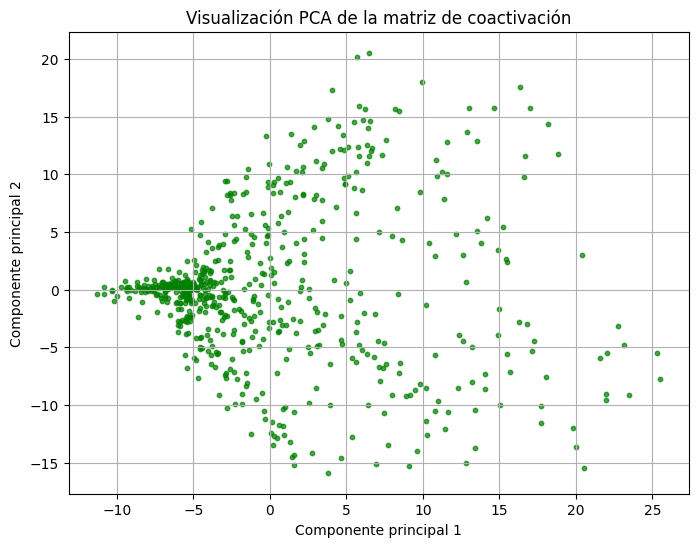

In [6]:
# cada fila como un vector de características
X = coact_mat

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reducir a 2 dimensiones para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Graficar con PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=10, alpha=0.7, color = 'green')
plt.title('Visualización PCA de la matriz de coactivación')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.grid(True)
plt.show()

## Método del codo

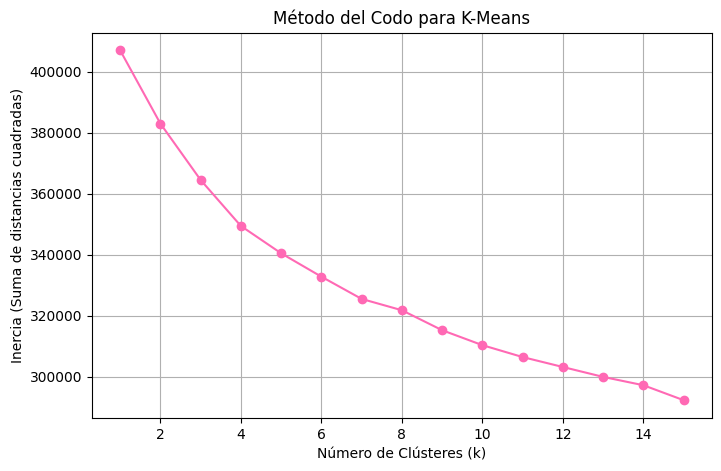

In [7]:
inertia = []
k_values = range(1,16)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init= 15)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', color = 'hotpink')
plt.title("Método del Codo para K-Means")
plt.xlabel("Número de Clústeres (k)")
plt.ylabel("Inercia (Suma de distancias cuadradas)")
plt.grid(True)
plt.show()

## Métodos de clustering

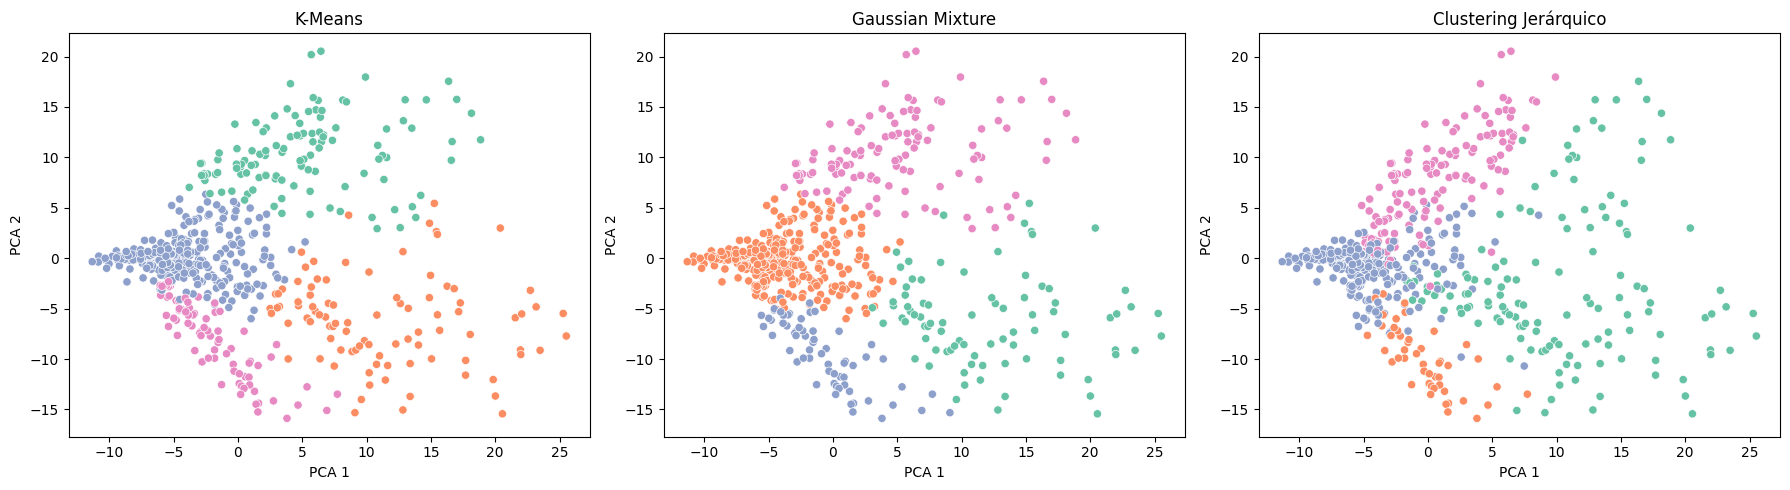

In [8]:
# Número de clusters según el codo

k_optimo= 4

# clustering con k-means
kmeans = KMeans(n_clusters=k_optimo, random_state=0, n_init=10)
labels_kmeans = kmeans.fit_predict(X_scaled)

# Modelo Gaussian Mixture
gmm = GaussianMixture(n_components=k_optimo, random_state=0)
labels_gmm = gmm.fit_predict(X_scaled)

## Clustering jerárquico usando linkage y corte
Z = linkage(X_scaled, method='ward')
labels_CJ = fcluster(Z, k_optimo, criterion='maxclust')

# cambiamos colores

paleta_color = sns.color_palette("Set2", k_optimo)

# Visualización en 2D -> PCA
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
titles = ['K-Means', 'Gaussian Mixture', 'Clustering Jerárquico']
label_sets = [labels_kmeans, labels_gmm, labels_CJ]

for ax, title, labels in zip(axes, titles, label_sets):
    sns.scatterplot(
        x=X_pca[:, 0], y=X_pca[:, 1],
        hue=labels,
        palette=paleta_color,
        legend=False,
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')

plt.tight_layout()
plt.show()

## 2. Ejercicio 2: Dataset Braintumor

1. Utilizar el método de codo para determinar el número de cluster óptimo (adecuado)
2. Utilizar 2 cluster con en cada método y calcular la matriz de confusión de cada método usando la columna 'Class' como groundthruth
3. ¿qué método recomendarías para este dataset?, ¿por qué?

In [9]:
df = pd.read_csv(r"C:\Users\anmen\OneDrive\Documentos\MATLAB\Brain Tumor.csv")

df.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [11]:
# separamos las características y etiquetas

X1 = df.drop(columns=['Class', 'Image'])
y = df['Class']

# Escalar los datos
scaler1 = StandardScaler()
X_scaled1 = scaler.fit_transform(X1)

In [12]:
pca1 = PCA(n_components=2)
X_pca1 = pca.fit_transform(X_scaled1)

## Método del codo

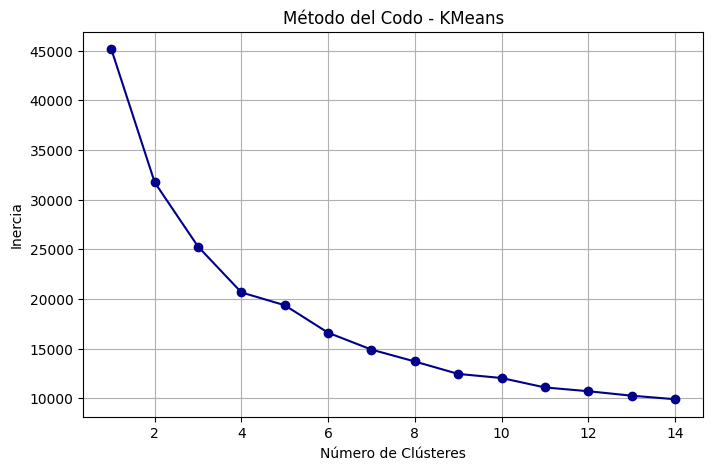

In [14]:
inercias1 = []
K_rango1 = range(1, 15)

for k in K_rango1:
    kmeans = KMeans(n_clusters =k, random_state = 42)
    kmeans.fit(X_scaled1)
    inercias1.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_rango1, inercias1, marker='o', color = 'DarkBlue')
plt.title('Método del Codo - KMeans')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

## Métodos de clustering

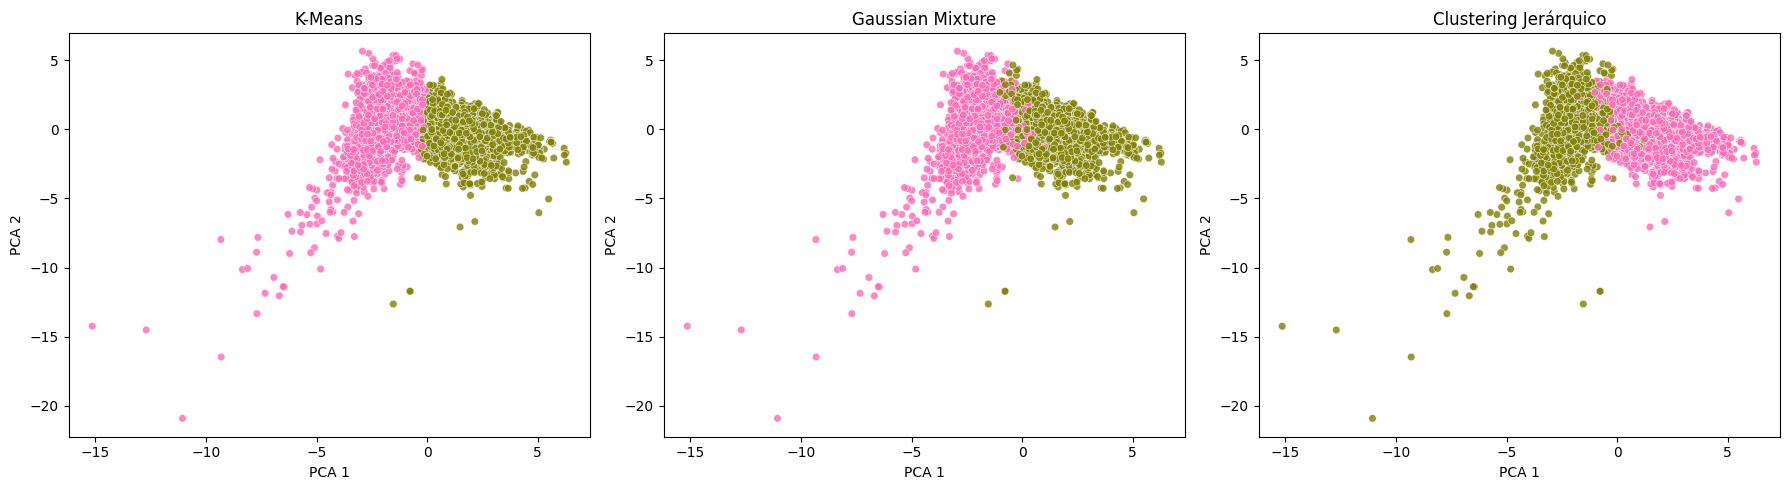

In [53]:
# Número de clusters según el codo

k_optimo= 2
n_clusters = 2

# K-Means con 2 clústeres
kmeans1 = KMeans(n_clusters=2, random_state=42)
labels_kmeans1 = kmeans1.fit_predict(X_scaled1)

# Gaussian Mixture Model
gmm1 = GaussianMixture(n_components=2, random_state=4)
labels_gmm1 = gmm1.fit_predict(X_scaled1)

# Clustering Jerárquico
z = AgglomerativeClustering(n_clusters=2)
labels_CJ1 = z.fit_predict(X_scaled1)

# Visualización

methods = ['K-Means', 'Gaussian Mixture', 'Clustering Jerárquico']
label_sets = [labels_kmeans1, labels_gmm1, labels_CJ1]
paleta_col =['olive', 'hotpink']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, method, labels in zip(axes, methods, label_sets):
    sns.scatterplot(
        x=X_pca1[:, 0], y=X_pca1[:, 1],
        hue=labels, palette=paleta_col, ax=ax, legend=False, s=30, alpha=0.8
    )
    ax.set_title(f'{method}')
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')

plt.tight_layout()
plt.show()

## Matrices de confusion

K-Means:
[[1978  101]
 [  80 1603]]
Gaussian Mixture:
[[2056   23]
 [  60 1623]]
Clustering Jerárquico:
[[  26 2053]
 [1589   94]]


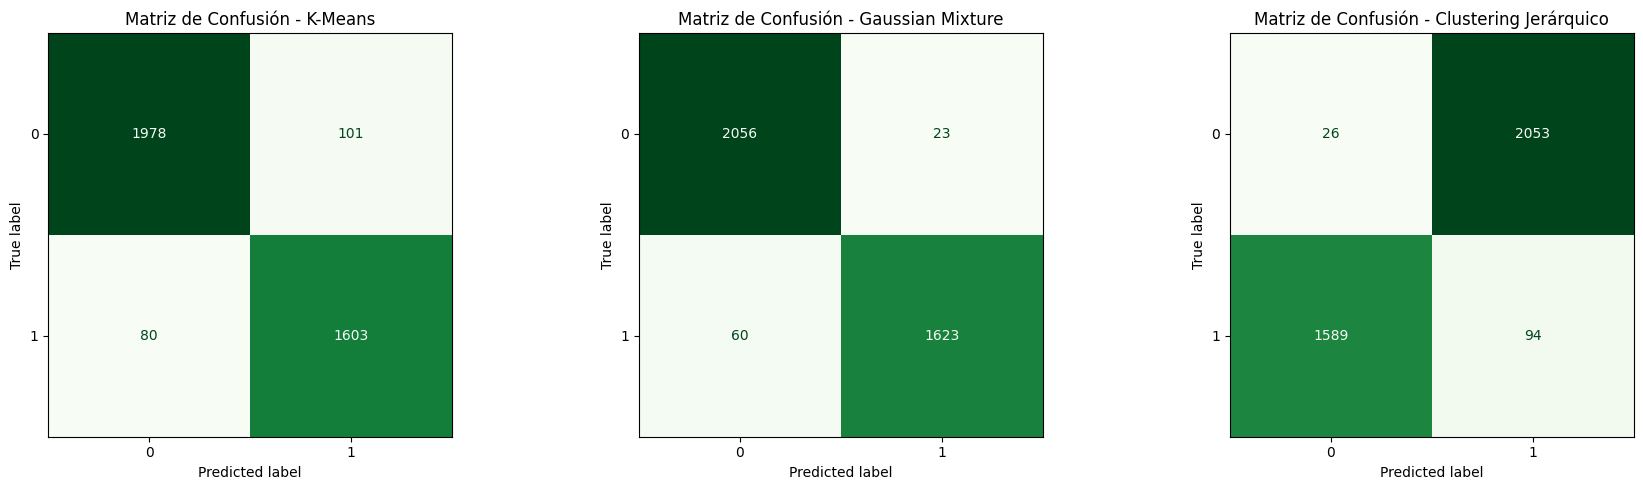

In [45]:
# Matriz de confusión
print("K-Means:")
print(confusion_matrix(y, labels_kmeans1))

# Gaussian Mixture
gmm1 = GaussianMixture(n_components=2)
labels_gmm1 = gmm1.fit_predict(X_scaled1)

print("Gaussian Mixture:")
print(confusion_matrix(y, labels_gmm1))

# Clustering Jerárquico
z = AgglomerativeClustering(n_clusters=2)
labels_CJ1 = z.fit_predict(X_scaled1)

print("Clustering Jerárquico:")
print(confusion_matrix(y, labels_CJ1))

# Matrices de confusión
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

#alinear etiquetas

def alinear_labels(y_true, y_pred):
    # Compara la exactitud de los labels originales contra su inverso
    acc_directo = accuracy_score(y_true, y_pred)
    acc_invertido = accuracy_score(y_true, 1 - y_pred)
    if acc_invertido > acc_directo:
        return 1 - y_pred
    return y_pred

for ax, labels, title in zip(
    axs,
    [labels_kmeans1, labels_gmm1, labels_CJ1],
    ["K-Means", "Gaussian Mixture", "Clustering Jerárquico"]
):
    cm = confusion_matrix(y, labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, colorbar=False, cmap = 'Greens')
    ax.set_title(f"Matriz de Confusión - {title}")

plt.tight_layout()
plt.show()

## ¿qué método recomendarías para este dataset?, ¿por qué?

Usaría Gaussian Mixture, muestra pocos falsos positivos (23), muchos verdaderos positivos (1603).
Tiene una menor cantidad de falsos negativos, eso significa que es mejor en la detección de tumores. Basándonos en los resultados de precision, accuracy, recall y F1-Score, se observa que este método tiene un buen desempeño y es equilibrado.

Gaussian Mixture no hace suposiciones rígidas sobre la forma de los clusters, este modelo asume que los datos provienen de una combinación de distribuciones gaussianas, nos permite capturar clusters elípticos, o sea, que tienen diferentes tamaños y orientaciones. Es un modelo flexible que nos permite analizar datos complejos o que se solapan, en el caso de los tumores, es mejor. 

## 3. Responde las siguientes preguntas:

### ¿Qué es precision? 
La precisión es la proporción de predicciones positivas correctas entre todas las predicciones positivas realizadas. O sea, de todas las veces que el modelo predijo que algo era positivo, ¿cuántas veces realmente lo fue?

Precisión = Verdaderos positivos / Verdaderos positivos + Falsos Positivos

**¿Cuántas de las predicciones positivas fueron realmente correctas?**

### ¿Qué es accuracy?
La exactitud es la proporción de todas las predicciones correctas (tanto positivas como negativas) sobre el total de predicciones.

Exactitud = Verdaderos positivos + Verdaderos Negativos / Total de casos

**¿Cuántas predicciones en total fueron correctas?**

### ¿Qué es recall?
El recall es la proporción de instancias positivas que fueron correctamente identificadas por el modelo. Quiere decir que, de todas las instancias que realmente son positivas, ¿cuántas el modelo logró identificar como positivas?

Recall = Verdaderos positivos / Verdaderos positivos + Falsos Negativos

**¿Cuántos de los casos positivos reales fueron identificados?**

### ¿Qué es f1-score?
El F1-score es la media armónica entre precisión y recall. Se utiliza cuando necesitas un balance entre ambos, especialmente cuando los datos son desbalanceados. Un valor de F1 cercano a 1 indica que el modelo tiene un buen equilibrio entre precisión y recall.

F1 = 2*Precision recall / precisión + recall

**Promedio armonizado entre precisión y recall.**

## 4. Cómo se relacionan las definiciones anteriores a la matriz de confusión?

Una matriz de confusión es una herramienta fundamental para entender cómo se comporta un modelo de clasificación. Relaciona los valores de las predicciones del modelo con las clases reales, y a partir de ella se derivan métricas como la precisión, recall, exactitud y F1-score. Una matriz de confusión es una tabla que se usa para describir el rendimiento de un modelo de clasificación, mostrando los valores de las predicciones en relación con las clases reales.

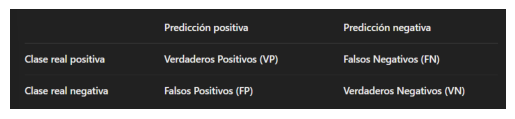

In [173]:
img = mpimg.imread(r"C:\Users\anmen\OneDrive\Documentos\MATLAB\matriz de confusion.png")
plt.imshow(img)
plt.axis('off')
plt.show()

Usando los datos de verdaderos positivos, falsos negativos, falsos positivos y verdaderos negativos de la matriz de confusión, se puede calcular la precisión, accuracy, recall y f1-score

### 5. A partir del resultado de 2.B, calcular precision, accuracy, recall y f1-score

In [46]:

# Función que ajusta los labels si están invertidos, y calcula métricas
def evaluate_clustering_multiclass(true, pred):
    acc1 = accuracy_score(true, pred)
    acc2 = accuracy_score(true, 1 - pred)
    if acc1 >= acc2:
        return {
            "accuracy": acc1,
            "precision": precision_score(true, pred, average='macro', zero_division=0),
            "recall": recall_score(true, pred, average='macro', zero_division=0),
            "f1": f1_score(true, pred, average='macro', zero_division=0)
        }
    else:
        return {
            "accuracy": acc2,
            "precision": precision_score(true, pred, average='macro', zero_division=0),
            "recall": recall_score(true, pred, average='macro', zero_division=0),
            "f1": f1_score(true, pred, average='macro', zero_division=0)
        }


# Evaluación de cada método
metrics_kmeans = evaluate_clustering_multiclass(y, labels_kmeans1)
metrics_gmm = evaluate_clustering_multiclass(y, labels_gmm1)
metrics_CJ = evaluate_clustering_multiclass(y, labels_CJ1)


# Mostrar resultados
def print_metrics(name, metrics):
    print(f"\\ {name}")
    for k, v in metrics.items():
        print(f"{k.capitalize()}: {v:.3f}")

print_metrics("K-Means", metrics_kmeans)
print_metrics("Gaussian Mixture", metrics_gmm)
print_metrics("Clustering Jerárquico", metrics_CJ)

\ K-Means
Accuracy: 0.952
Precision: 0.951
Recall: 0.952
F1: 0.951
\ Gaussian Mixture
Accuracy: 0.978
Precision: 0.979
Recall: 0.977
F1: 0.978
\ Clustering Jerárquico
Accuracy: 0.968
Precision: 0.030
Recall: 0.034
F1: 0.032
